In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import json

# Data

In [2]:
data1 = pd.read_csv('data/int20h-ds-test-dataset.csv')
data1

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"
...,...,...,...,...,...,...,...,...
23352,679eba26c4e75e0afb178360becfa21b,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":"""",...",2022-04-16 20:49:24,android,Google,Pixel 3a
23353,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Address""}",2022-04-16 20:50:05,android,Google,Pixel 3a
23354,679eba26c4e75e0afb178360becfa21b,CA,Account Setup Profile Skip,"{""Screen"":""Phone Number""}",2022-04-16 20:50:10,android,Google,Pixel 3a
23355,679eba26c4e75e0afb178360becfa21b,CA,Chat Conversation Opened,"{""From"":""Dashboard"",""Transaction type"":""""}",2022-04-16 20:50:31,android,Google,Pixel 3a


## Data transformation

In [3]:
data1['device_manufacture'] = data1['device_manufacture'].fillna("NA")
data1['device_model'] = data1['device_model'].fillna("NA")
data1['user_state'] = data1['user_state'].fillna("na")

data = pd.DataFrame.copy(data1)
data['userid'], _ = pd.factorize(data['userid'])
data['event_name'], _ = pd.factorize(data['event_name'])
data['event_platform'], _ = pd.factorize(data['event_platform'])
data['user_state'], _ = pd.factorize(data['user_state'])
data['device_manufacture'], _ = pd.factorize(data['device_manufacture'])
data['device_model'], _ = pd.factorize(data['device_model'])

data

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,0,0,0,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,0,0,0
1,0,0,1,{},2022-01-16 17:07:47,0,0,0
2,1,1,2,{},2022-01-16 17:16:25,0,0,1
3,0,0,3,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,0,0,0
4,2,2,4,"{""Method"":""Apple""}",2022-01-16 17:34:51,1,1,2
...,...,...,...,...,...,...,...,...
23352,3537,0,3,"{""Payment Method"":""Credit"",""Tokenized Pay"":"""",...",2022-04-16 20:49:24,0,9,166
23353,3537,0,12,"{""Screen"":""Address""}",2022-04-16 20:50:05,0,9,166
23354,3537,0,12,"{""Screen"":""Phone Number""}",2022-04-16 20:50:10,0,9,166
23355,3537,0,11,"{""From"":""Dashboard"",""Transaction type"":""""}",2022-04-16 20:50:31,0,9,166


In [4]:
data.isnull().sum()

userid                0
user_state            0
event_name            0
event_attributes      0
event_created_date    0
event_platform        0
device_manufacture    0
device_model          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              23357 non-null  int64 
 1   user_state          23357 non-null  int64 
 2   event_name          23357 non-null  int64 
 3   event_attributes    23357 non-null  object
 4   event_created_date  23357 non-null  object
 5   event_platform      23357 non-null  int64 
 6   device_manufacture  23357 non-null  int64 
 7   device_model        23357 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.4+ MB


In [6]:
events = data1['event_name'].unique()
events

array(['Add Vehicle Success', 'Add Vehicle Break', 'Calculator View',
       'Add Payment Method Success', 'Sign Up Success',
       'Add Payment Method Failed', 'Wallet Opened', 'Transaction Refund',
       'Email Confirmation Success', 'Account Setup Skip',
       'Subscription Premium', 'Chat Conversation Opened',
       'Account Setup Profile Skip',
       'Account History Transaction Details', 'Sign Out',
       'Chat Conversation Started', 'Order', 'Sign Up Error',
       'Subscription Premium Cancel', 'Calculator Used',
       'Subscription Premium Renew', 'Add Vehicle Failed',
       'Reset Password Set'], dtype=object)

In [7]:
users = data['userid'].unique()
users

array([   0,    1,    2, ..., 3537, 3538, 3539])

In [8]:
data1['user_state'].unique()

array(['CA', 'FL', 'IL', 'TX', 'na', 'VA', 'DE', 'WI', 'NY', 'CT', 'WA',
       'PA', 'MD', 'MN', 'MA', 'NJ', 'OK', 'SC', 'DC', 'AZ', 'MI', 'CO',
       'AR', 'RI', 'SD', 'NC', 'IA', 'WV', 'IN', 'MO', 'OH', 'TN', 'NV',
       'NH', 'OR', 'GA', 'ID', 'AL', 'AK', 'HI', 'NE', 'UT', 'ME', 'KY',
       'LA', 'NM', 'KS', 'VT', 'MS', 'MT'], dtype=object)

In [9]:
data1['event_platform'].unique()

array(['android', 'ios', 'outofband'], dtype=object)

In [28]:
data1['device_manufacture'].unique()


array(['samsung', 'Apple', 'TCL', 'NA', 'motorola', 'Yulong', 'Wingtech',
       'OnePlus', 'LGE', 'Google', 'realme', 'FIH', 'HMD Global',
       'Xiaomi', 'BLU', 'vsmart', 'HUAWEI', 'OPPO', 'KYOCERA', 'Umx',
       'HTC', 'Alcatel', 'ZTE'], dtype=object)

# Correlation analysis

In [11]:
def corr_params(data_, param):

    dums = np.zeros([len(data_['userid'].unique()), len(data_[param].unique())])

    for user in range(len(users)):
        for i in (data_[data_["userid"]==user])[param].unique():
            dums[user, i] = 1

    dums = pd.DataFrame(dums)
    return dums


### Event correlation analysis

In [12]:
dums_event_name = corr_params(data, "event_name")
dums_event_name.columns = data1["event_name"].unique()
dums_event_name

,Add Vehicle Success,Add Vehicle Break,Calculator View,Add Payment Method Success,Sign Up Success,Add Payment Method Failed,Wallet Opened,Transaction Refund,Email Confirmation Success,Account Setup Skip,...,Account History Transaction Details,Sign Out,Chat Conversation Started,Order,Sign Up Error,Subscription Premium Cancel,Calculator Used,Subscription Premium Renew,Add Vehicle Failed,Reset Password Set
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3536,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3537,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
outcomes = dums_event_name["Subscription Premium Cancel"]
outcomes

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3535    0.0
3536    0.0
3537    0.0
3538    0.0
3539    0.0
Name: Subscription Premium Cancel, Length: 3540, dtype: float64

<AxesSubplot: >

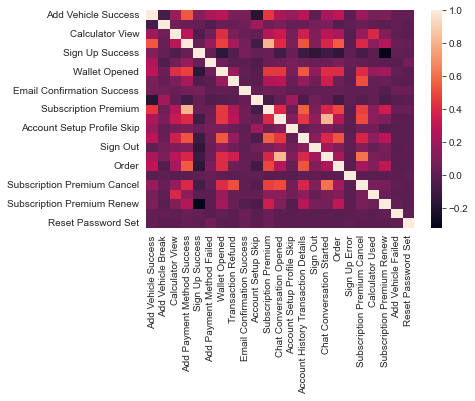

In [14]:
sns.heatmap(dums_event_name.corr())

In [15]:
res1 = dums_event_name.corr()['Subscription Premium Cancel'].sort_values(ascending = False)
res1

Subscription Premium Cancel            1.000000
Chat Conversation Started              0.611561
Transaction Refund                     0.513358
Chat Conversation Opened               0.504251
Subscription Premium                   0.474124
Wallet Opened                          0.407727
Add Payment Method Success             0.399625
Account History Transaction Details    0.390271
Order                                  0.220185
Add Vehicle Success                    0.189187
Calculator View                        0.173436
Sign Out                               0.115843
Subscription Premium Renew             0.082021
Calculator Used                        0.077151
Account Setup Profile Skip             0.061956
Add Vehicle Break                      0.030193
Add Payment Method Failed              0.012021
Add Vehicle Failed                     0.007909
Email Confirmation Success             0.005877
Sign Up Error                         -0.003270
Reset Password Set                    -0

### Event platform correlation analysis

In [16]:
dums_event_platform = corr_params(data, "event_platform")
dums_event_platform.columns = data1["event_platform"].unique()
dums_event_platform['outcomes']=outcomes
dums_event_platform

,android,ios,outofband,outcomes
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
3535,1.0,0.0,1.0,0.0
3536,1.0,0.0,1.0,0.0
3537,1.0,0.0,1.0,0.0
3538,0.0,1.0,0.0,0.0


<AxesSubplot: >

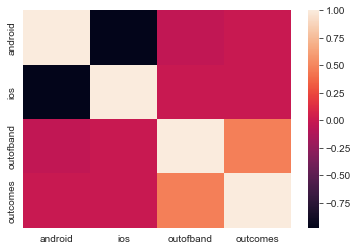

In [17]:
sns.heatmap(dums_event_platform.corr())

In [18]:
res2 = dums_event_platform.corr()["outcomes"].sort_values(ascending=False)
res2

outcomes     1.000000
outofband    0.472783
ios          0.002211
android      0.000810
Name: outcomes, dtype: float64

### User states correlation analysis

In [19]:
dums_user_state = corr_params(data, "user_state")
dums_user_state.columns = data1["user_state"].unique()
dums_user_state['outcomes']=outcomes
dums_user_state

,CA,FL,IL,TX,na,VA,DE,WI,NY,CT,...,UT,ME,KY,LA,NM,KS,VT,MS,MT,outcomes
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3537,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

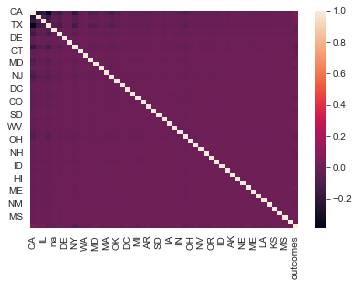

In [20]:
sns.heatmap(dums_user_state.corr())

In [29]:
res3 = dums_user_state.corr()["outcomes"].sort_values(ascending=False)
res3

outcomes    1.000000
CA          0.048833
TN          0.029778
MD          0.025719
UT          0.023469
AR          0.021760
IL          0.021541
MA          0.019013
IA          0.018916
KY          0.018916
AL          0.015374
IN          0.012651
WV          0.012478
DC          0.010031
GA          0.010031
FL          0.009287
DE          0.004352
CO          0.004352
OK         -0.000686
AZ         -0.001077
NC         -0.002206
NJ         -0.003145
WI         -0.004275
HI         -0.004644
MS         -0.004644
KS         -0.004644
VT         -0.004644
MT         -0.004644
VA         -0.006369
NE         -0.006568
SD         -0.006568
ID         -0.006568
AK         -0.006568
LA         -0.006568
PA         -0.008007
NM         -0.008045
RI         -0.008045
WA         -0.008045
SC         -0.009291
ME         -0.009291
NH         -0.009291
NV         -0.011383
OR         -0.012297
MN         -0.013947
OH         -0.015423
CT         -0.018021
MI         -0.018614
TX         -0

### Device manufacture correlation analysis

In [30]:
dums_dev_man = corr_params(data, "device_manufacture")
dums_dev_man.columns = data1["device_manufacture"].unique()
dums_dev_man['outcomes']=outcomes
dums_dev_man

,samsung,Apple,TCL,NA,motorola,Yulong,Wingtech,OnePlus,LGE,Google,...,BLU,vsmart,HUAWEI,OPPO,KYOCERA,Umx,HTC,Alcatel,ZTE,outcomes
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3536,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3537,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

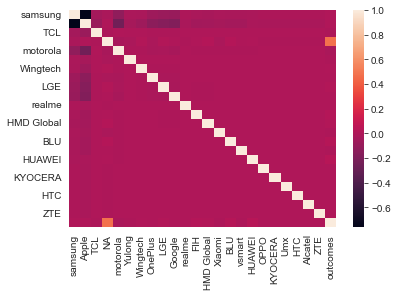

In [31]:
sns.heatmap(dums_dev_man.corr())

In [32]:
res4 = dums_dev_man.corr()["outcomes"].sort_values(ascending=False)
res4

outcomes      1.000000
NA            0.472783
HUAWEI        0.029778
BLU           0.023469
FIH           0.015374
HMD Global    0.012478
LGE           0.012078
samsung       0.007422
Wingtech      0.002824
Apple         0.002211
Google       -0.001363
OnePlus      -0.004468
HTC          -0.004644
ZTE          -0.004644
realme       -0.004644
Alcatel      -0.004644
OPPO         -0.004644
Umx          -0.004644
KYOCERA      -0.004644
TCL          -0.006139
Xiaomi       -0.008045
Yulong       -0.008045
vsmart       -0.009291
motorola     -0.021521
Name: outcomes, dtype: float64

_______

The biggest Pearson's correlation refers to the following events:

-- "Chat Conversation Started"
-- "Transaction Refund"
-- "Chat Conversation Opened"
-- "Subscription Premium"
-- "Wallet Opened"

"Device platform" and "Device manufacturer" marked as 'outofband' and 'NA' has bigger correlation with subscription cancellation. If device manufacturer or platform is not assigned or out of band, the cancellation of subscription is more likely to occur.